## Objetivo

Este projeto visa a participação do "Desafio Data Analyst ConexaLabs 2020".

![](https://d335luupugsy2.cloudfront.net/cms/files/102645/1608819521/$obdchp1q3i)

Se utilizará os dados do navio Titanic. Respondendo as seguintes questões:

1. Como as características coletadas se comportam em relação à cidade de embarque?
2. Como as características coletadas se comportam em relação ao preço da passagem?
3. Como as características coletadas se comportam em relação à sobrevivência dos passageiros?
4. Como essas 3 variáveis (embarked, fare e survival) se relacionam entre si?

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

link = 'https://github.com/conexalabs/desafio-data-analyst/blob/main/data/titanic.parquet?raw=true'
data_titanic = pd.read_parquet(link)
#sns.set_style("whitegrid")

========================================

========================================

## O banco de dados:

In [28]:
data_titanic.head(n=10)

,name,survival,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,"Braund, Mr. Owen Harris",0.0,3,male,22.0,1,0,A/5 21171,7.2500,None,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,"Heikkinen, Miss. Laina",1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,1,female,35.0,1,0,113803,53.1000,C123,S
4,"Allen, Mr. William Henry",0.0,3,male,35.0,0,0,373450,8.0500,None,S
5,"Moran, Mr. James",0.0,3,male,NaN,0,0,330877,8.4583,None,Q
6,"McCarthy, Mr. Timothy J",0.0,1,male,54.0,0,0,17463,51.8625,E46,S
7,"Palsson, Master. Gosta Leonard",0.0,3,male,2.0,3,1,349909,21.0750,None,S
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1.0,3,female,27.0,0,2,347742,11.1333,None,S
9,"Nasser, Mrs. Nicholas (Adele Achem)",1.0,2,female,14.0,1,0,237736,30.0708,None,C


### Tratamento inicial dos dados

- Verifiquemos a existência de dados faltantes,
- posteriormente a existência de linhas duplicadas.

In [29]:
print("Dimensões do banco:", data_titanic.shape)
print("==============================")
print("Quantidade de Dados faltantes \n em cada variável")
print("==============================")
print(data_titanic.isna().sum(axis = 0))
print("==============================")

Dimensões do banco: (1309, 11)
Quantidade de Dados faltantes 
 em cada variável
name           0
survival     418
pclass         0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64


As colunas **survival**, **age** e **cabin** possuem uma quantidade considerável de dados faltantes, portanto sofreram tratamentos. As colunas **fare** e **embarked** possuem tão poucos dados faltantes que não convém fazer nenhum tipo de inputação.

Para as variáveis categóricas **survival** e **cabin** substituiremos os valores faltantes por **Não-informado(a)**. Enquanto a variável numérica **age** a inputação se fará pela média.

In [30]:
data_titanic["survival"] = data_titanic["survival"].fillna("Não informado")
data_titanic["cabin"] = data_titanic["cabin"].fillna("Não informada")

mAge = data_titanic["age"].mean()
data_titanic["age"] = data_titanic["age"].fillna(mAge)

print("================")
print(data_titanic.isna().sum(axis = 0))
print("================")

name        0
survival    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        1
cabin       0
embarked    2
dtype: int64


Quantidade de células duplicadas:

In [31]:
data_titanic.duplicated().sum()

0

==============================================================================================

==============================================================================================

### DICIONÁRIO DE DADOS:

- name: Nome do passageiro

- survival: 0 = Não sobreviveu; 1 = Sobreviveu

- pclass: Classe na qual o passageiro viajou. (1 = Primeira Classe; 2 = Segunda Classe; 3 = Terceira Classe)

- sex: Sexo do passageiro (0 = Masculino; 1 = Feminino)

- age: Idade do passageiro

- sibsp*: Número de irmãos/cônjuges a bordo do Titanic

- parch*: Número de pais/filhos a bordo do Titanic

-  ticket: Número do bilhete

- fare: Tarifa do passageiro

- cabin: Número da cabine

- embarked: Embarcado em (C = Cherbourg, Q = Queenstown, S = Southampton)


==============================================================================================


==============================================================================================

<i>
 <strong>
  <font style="color: rgb(64,200,124); font-family: Arial">

# Introdução - O inafundável
      
      
No dia 02 de Abril, após atrasos devido a mau tempo o maior navio de passageiros da época, o britânico Titanic, partia na sua primeira aventura nos mares. Partiu a 6 horas da manhã e atracou após vários testes às 19 horas do mesmo dia. Sendo declarado funcional para navegar. E uma hora depois partiu da cidade onde foi construído (Belfast) para Southampton.

 
No dia 04 de Abril, após uma viagem de 28 horas de duração, atracou com a sua tripulação ilesa na cidade de Southampton 6 dias antes de sua viagem de estréia.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Titanic_in_color.png/800px-Titanic_in_color.png)

No dia 10 de Abril, na mesma cidade, o Titanic partia na sua viagem inaugural, se dirigindo para Chergougn e Queenstown coletando passageiros ávidos por ter viagem de suas vidas. Atravessar o Atlântico e chegar as Américas,

No banco de dados utilizados nesse estudo o total de pessoas analizadas foi de 1309. Com as seguintes quantidades que subiram em cada um dos embarques:
  </font>
 </strong>
</i>



Embarque em Southampton: 914 ;
			   69.82 % do total
Embarque em Southampton: 270 ;
			   20.63 % do total
Embarque em Queenstown: 123
			   9.4 % do total
	 Num total de 1309 pessoas


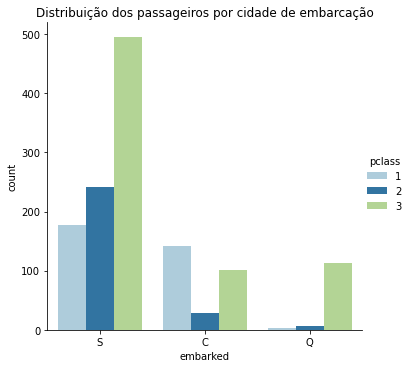

In [32]:
sns.catplot(x = "embarked",
            kind = "count",
            hue = "pclass",
            palette = "Paired",
            data = data_titanic
            )
plt.title('Distribuição dos passageiros por cidade de embarcação')

nrow = data_titanic.shape[0]
nrow_s = data_titanic.query('embarked=="S"').shape[0]
nrow_c = data_titanic.query('embarked=="C"').shape[0]
nrow_q = data_titanic.query('embarked=="Q"').shape[0]

print("Embarque em Southampton:", nrow_s, ";")
print("\t\t\t  ", round(nrow_s/nrow*100,2), "% do total")
print("Embarque em Southampton:", nrow_c, ";")
print("\t\t\t  ", round(nrow_c/nrow*100,2), "% do total")
print("Embarque em Queenstown:", nrow_q)
print("\t\t\t  ", round(nrow_q/nrow*100,2), "% do total")
print("\t Num total de", nrow, "pessoas")

#data_titanic["embarked"].value_counts()

## 1. Como as características coletadas se comportam em relação à cidade de embarque?

Podemos perceber que nas embarcações de S (Southampton) e C (Chergougn), os valores foram mais balanceados. Enquanto os passageiros que subiram na cidade Q (Queenstown) compraram predominandemente passagens na 3ª classe. Isso fica evidente no quadro de medidas descritivas dos preços das passagens (fare).

### 1.2 O preço da passagem

In [33]:
data_titanic.groupby('embarked').agg(
    {'fare': [min, max, 'median', 'mean', 'count', sum, ]}
)

fare                                                 
             min       max    median       mean count         sum
embarked                                                         
C         4.0125  512.3292  28.51875  62.336267   270  16830.7922
Q         6.7500   90.0000   7.75000  12.409012   123   1526.3085
S         0.0000  263.0000  13.00000  27.418824   913  25033.3862

É notório a diferença das médias, porém devido a presença de vários outliers iremos nos ater mais a diferença entre as medianas. 

- Em S é duas vezes maior em relação a Q. 
- E três vezes maior comparando C com Q.
- Q < S < C

Text(0.5, 1.0, 'Preços: 1 classe')

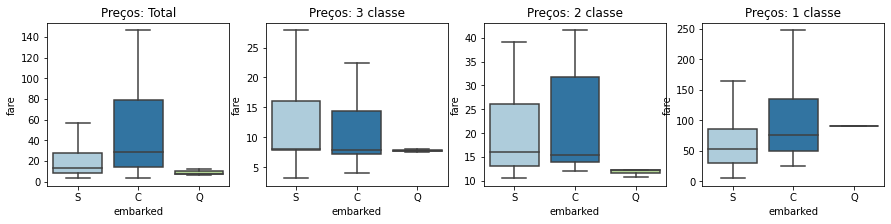

In [34]:
priceC1 = data_titanic.query('fare!=0').query('pclass==1')
priceC2 = data_titanic.query('fare!=0').query('pclass==2')
priceC3 = data_titanic.query('fare!=0').query('pclass==3')

import pylab
fig, ax = plt.subplots(1,4, figsize=(15,3))
sns.boxplot(data = data_titanic.query('fare!=0'),
            x = "embarked",
            y = "fare",
            palette = "Paired",
            order = ["S", "C", "Q"],
            showfliers=False,
            ax = ax[0] # Não plotar outliers para facilitar a visualização
           )
sns.boxplot(data = priceC3,
            x = "embarked",
            y = "fare",
            palette = "Paired",
            order = ["S", "C", "Q"],
            showfliers=False, # Não plotar outliers para facilitar a visualização
            ax = ax[1]
           )
sns.boxplot(data = priceC2,
            x = "embarked",
            y = "fare",
            palette = "Paired",
            order = ["S", "C", "Q"],
            showfliers=False,
            ax = ax[2]
           )
sns.boxplot(data = priceC1,
            x = "embarked",
            y = "fare",
            palette = "Paired",
            order = ["S", "C", "Q"],
            showfliers=False,
            ax = ax[3]
           )

ax[0].set_title('Preços: Total')
ax[1].set_title('Preços: 3 classe')
ax[2].set_title('Preços: 2 classe')
ax[3].set_title('Preços: 1 classe')

Porém quando separamos os dados entre as classes de viagem, vemos que em geral na cidade C foi onde houveram em geral preços maiores no Total, na segunda e primeira classe. Seguidos pelas cidade S que teve preços maiores na terceira classe e ao fim Q que costumou ter os menores preços.

- Q < C < S

### 1.3 Idade

In [35]:
data_titanic.groupby('embarked').agg(
    {'age': [min, max, 'median', 'mean', 'count']}
)

age                                  
           min   max     median       mean count
embarked                                        
C         0.42  71.0  29.881138  31.805652   270
Q         2.00  70.5  29.881138  29.372545   123
S         0.17  80.0  29.881138  29.337046   914

Já as idades das pessoas, não se diferenciam muito pouco em relação a cidade de embarque. Com mínima, máxima, mediana e média bem parecidas.

*ps. lembrando que idade em números não-inteiros se tratam de estimativas.*

### 1.4 Sexo

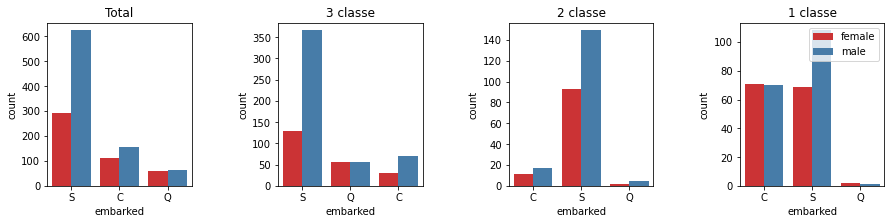

In [36]:
import pylab
fig, ax = plt.subplots(1,4, figsize=(15, 3))
sns.countplot(x = data_titanic["embarked"],
            hue = data_titanic["sex"],
            hue_order = ["female", "male"],
            palette = "Set1",
            ax = ax[0]
            )
sns.countplot(x = data_titanic.query('pclass==3')["embarked"],
            hue = data_titanic.query('pclass==3')["sex"],
            hue_order = ["female", "male"],
            palette = "Set1",
            ax = ax[1]
            )
sns.countplot(x = data_titanic.query('pclass==2')["embarked"],
            hue = data_titanic.query('pclass==2')["sex"],
            hue_order = ["female", "male"],
            palette = "Set1",
            ax = ax[2]
            )
sns.countplot(x = data_titanic.query('pclass==1')["embarked"],
            hue = data_titanic.query('pclass==1')["sex"],
            hue_order = ["female", "male"],
            palette = "Set1",
            ax = ax[3]
            )

ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()
pylab.legend(loc='best')

ax[0].set_title('Total')
ax[1].set_title('3 classe')
ax[2].set_title('2 classe')
ax[3].set_title('1 classe')
fig.subplots_adjust(wspace = .6)

A maior parte dos passageiros eram homens, sendo a proporção muito maior na terceira classe com embarque em Southampton. Apesar de que essa maioria se confirme em todos on níveis, exceto 1 classe com embarque em Queenstown (onde embarcaram 1 homem e duas mulheres), essa diferença fica menos acentuado a medida que se olha classes - pclass - melhores.

## 2. Como as características coletadas se comportam em relação ao preço da passagem?

### 2.1 Pclass

Assim como esperado, vemos que o preço das passagens sofrem uma influência tremenda da categoria de classe em que se deseja viajar. Obviamente sendo a segunda classe mais cara do que a terceira e a primeira classe mais cara do que as duas outras. Sendo uma passagem de primeira classe com o valor quase 10 vezes mais do que uma de segunda classe, que por sua vezes valia quase 10 vezes mais do que uma passagem na terceira classe.

Text(0.5, 1.0, 'Preços das passagens por Classe')

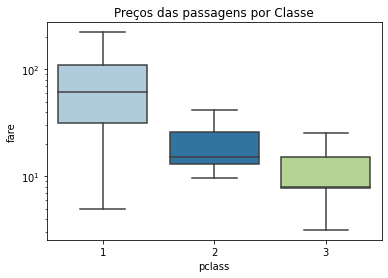

In [37]:
plt.yscale('log') # Escala em log_10, melhor visualizacao
sns.boxplot(
    data = data_titanic.query('fare!=0'), # retirar os zero devido a log(0)=inf
    x = "pclass",
    y="fare",
    palette = "Paired",
    showfliers = False
)
plt.title('Preços das passagens por Classe')

Por mais que as acomodações da terceira classe do Titanic fossem consideradas excepcionais na época.

<table><tr>
<td> 
  <p align="center" style="padding: 10px">
    <img alt="Forwarding" src="https://static.wikia.nocookie.net/titanic/images/d/da/Titanic_3rd_class.jpg" width="320">
    <br>
    <em style="color: grey">Terceira classe</em>
  </p> 
</td>
<td> 
  <p align="center">
    <img alt="Routing" src="https://static.wikia.nocookie.net/titanic/images/8/87/20201128_165654.jpg" width="320">
    <br>
    <em style="color: grey">Terceira classe</em>
  </p> 
</td>
</tr></table>

O topo do navio, onde ficava a primeira classe, podia ser considerada um mundo a parte. E a diferença astronômica dos preços, era convertida fielmente nas instalações.

<table><tr>
<td> 
  <p align="center" style="padding: 10px">
    <img alt="Forwarding" src="https://images.squarespace-cdn.com/content/v1/5006453fe4b09ef2252ba068/1351507897498-5NR30EWR0THJADWKRNWD/ke17ZwdGBToddI8pDm48kJeJHJwC6a6EsSJOBBjFhV9Zw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZUJFbgE-7XRK3dMEBRBhUpzDyK0yyeJKIY_i0u68MjTVXsF0JxhrS6Mqua5wjwegnaK2LCQsTlqKP_tB0-z4t8c/first+class+cabin.jpg" width="320">
    <br>
    <em style="color: grey">Primeira classe</em>
  </p> 
</td>
<td> 
  <p align="center">
    <img alt="Routing" src="https://images.squarespace-cdn.com/content/v1/5006453fe4b09ef2252ba068/1351508433394-L732R82D33DED9YYDY65/ke17ZwdGBToddI8pDm48kAR7vG2QfD3uW0H7YLf9VaYUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKcT3f5-rKIYluIX58xa6tfcBn_TXvNu7kmrqqSJvyZGOaDbqGgO06TDcYHqFgl4xk9/Titanic%27s_grand_staircase.jpg" width="320">
    <br>
    <em style="color: grey">Terceira classe</em>
  </p> 
</td>
</tr></table>

### 2.2 Sexo

Mulheres também costumaram pagar mais do que homens. Contudo, quando é levado em conta a variável 'parch' a situação muda completamente, sendo até invertida em muitos casos. As variáveis de 'embarque' e 'sibsp' não influenciam muito no resultado.

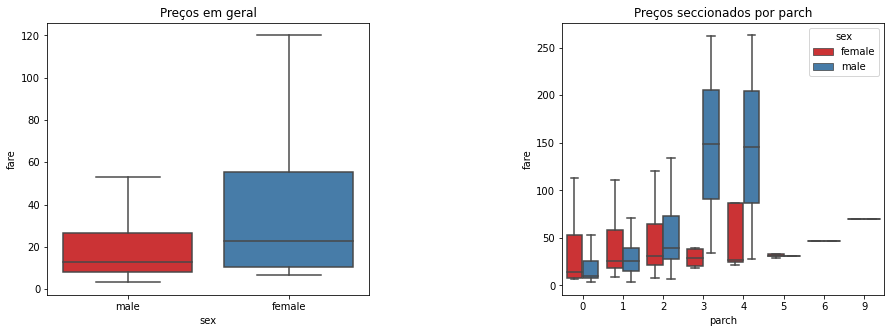

In [38]:
#plt.yscale('log') # Escala em log_10, melhor visualizacao
fig, ax = plt.subplots(1,2, figsize=(15, 5))

sns.boxplot(
    data = data_titanic.query('fare!=0'), # retirar os zero devido a log(0)=inf
    x = "sex",
    y="fare",
    palette = "Set1",
    showfliers = False,
    ax = ax[0]
)
sns.boxplot(
    data = data_titanic.query('fare!=0'),
    x = "parch",
    hue = "sex",
    y = "fare",
    hue_order = ['female', 'male'],
    palette = "Set1",
    showfliers = False,
    ax = ax[1]
)

ax[0].set_title('Preços em geral')
ax[1].set_title('Preços seccionados por parch')
fig.subplots_adjust(wspace = .6)

### 2.2 Parentes a bordo (parch)

In [39]:
data_titanic.groupby('parch').agg(
    {'fare': [min, max, 'median', 'mean', 'count']}
)

fare                                      
           min       max    median        mean count
parch                                               
0       0.0000  512.3292  10.50000   26.329820  1001
1       3.1708  512.3292  26.00000   50.078358   170
2       7.2292  263.0000  31.38750   61.346275   113
3      18.7500  262.3750  34.37500   86.688537     8
4      21.0750  263.0000  27.90000  104.723617     6
5      29.1250   39.6875  31.33125   32.356250     6
6      46.9000   46.9000  46.90000   46.900000     2
9      69.5500   69.5500  69.55000   69.550000     2

Também quando olhamos para a variável 'parch' sem a interação com o sexo, vemos que ele tem um peso considerável no preço das passagens. É provável que o preço da passagem de um grupo de familiares fosse cobrado na entrada da pessoa responsável. Vemos isso não somente na média e mediana, mas principalmente na diferença constante do mínimo.

## 3. Como as características coletadas se comportam em relação à sobrevivência dos passageiros?


<p>
<i>
<strong>
<font style="color: rgb(64,200,124); font-family: Arial">
   Por ter sido de forma não-oficial declarado impossível de afundar, os naúticos responsáveis escolheram por gastar menos espaço do navio com botes salva-vidas que atrapalhariam a vistas dos salões. Afinal jamais precisariam utilizar esses botes em larga escala.
</font>
</strong>
</i>
</p>

<p>
<i>
<strong>
<font style="color: rgb(64,200,124); font-family: Arial">
    Então restringiram os botes para um navio com capacidade de aproximadamente 2300 pessoas (entre tripulação e passageiros) para 1272 pessoas, pouco mais da metade.
</font>
</strong>
</i>
</p>


<p>
<i>
<strong>
<font style="color: rgb(64,200,124); font-family: Arial">
    No dia 14 de Abril, o dia começa com o que para alguns passageiros era um espetáculo e tanto. O mar apresentava esporadicamente, grande blocos de gelo com cortes claros, finos. E segundos alguns, com pedaços de gelo sólido que refletiam como um prisma a luz solar. Titanic viajava a incríveis 22 nós (41 km/h; 25 mph), somente 2 nós (~4km/h) de sua velocidade máxima.
</font>
</strong>
</i>
</p>

<p>
<i>
<strong>
<font style="color: rgb(64,200,124); font-family: Arial">
   No dia 14 de Abril, 9 horas da manhã, Titanic recebe um aviso do navio RMS Caronia sobre a presença de muitos icebergs no mar onde os dois navios navegavam. O navio continua a 22 nós.
</font>
</strong>
</i>
</p>

<p>
<i>
<strong>
<font style="color: rgb(64,200,124); font-family: Arial">
    14 de Abril, poucos minutos após as 20 horas, Titanic recebe um aviso do navio SS California sobre a presença de imensos campos de gelo no mar e abundância de iceberg nas vias marítimas. O capitão mantém a mesma velocidade.
</p>
</i>
</strong>
    </p>

<p>
<i>
<strong>
<font style="color: rgb(64,200,124); font-family: Arial">
    21h40, SS California reforça o aviso, agora acrescentando confirmação visual da existência de 3 icebergs imensos. Desde 1907, após um navio ter uma grande colisão com um iceberg e mesmo assim completar sua viagem, era de 'conhecimento' comum que icebergs seriam de baixo risco a grandes navios; segundo o futuro capitão do Titanic ainda em 1907, "em quais condições um iceberg poderia afundar um navio? Não mais, navios modernos já ultrapassaram esse risco há muito tempo" [Barczewski, Stephanie (2006). Titanic: A Night Remembered. London: Continuum International Publishing Group. ISBN 978-1-85285-500-0.]
</font>
</strong>
</i>
</p>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Size_Titanic.png/1280px-Size_Titanic.png" width="500">

<p>
<i>
<strong>
<font style="color: rgb(64,200,124); font-family: Arial">
   No total houve 6 avisos de rádio sobre icebergs para o Titanic e nenhuma alteração na velocidade do transatlântico. Hoje isso nos pode soar loucura, algo fácil de se condenar. Mas a época, era prática comum entre marinheiros.
</font>
</strong>
</i>
</p>

<p>
<i>
<strong>
<font style="color: rgb(64,200,124); font-family: Arial">
   Dia 15 de Abril, meia-noite, a colisão com o Iceberg já ocorreu há 20 minutos. E por particularidades da fusilagem do navio que passaremos por alto, o dano é fatal. A água começa a tomar o seu lugar dentro do navio e este está fadado a descer.
</font>
</strong>
</i>
</p>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Iceberg_and_titanic_%28fr%29.svg/511px-Iceberg_and_titanic_%28fr%29.svg.png" width="200">

<p>
<i>
<strong>
<font style="color: rgb(64,200,124); font-family: Arial">
   Tudo indica que as últimas mensagem enviadas pelo SS California e outros nunca saíram da sala rádio do navio, que estava mais empenha a transmitir aos passageiros mensagens do noticiário local.
</font>
</strong>
</i>
</p>

Nesta parte iremos nos restringir ao dados em que é sabido se a pessoa sobreviveu ou não, pois as observações onde não há esse registro não agregaram informação nem ao estudo, nem a resposta da pergunta. Havendo, é claro, valor em outros contexto, mas não nesse.

In [40]:
surv = data_titanic.query('survival!="Não informado"')
surv.shape[0]

891

    
![](http://3.bp.blogspot.com/-ma3kwcYnw-Y/T4uMHdCJPJI/AAAAAAAADS4/KZDUjlpsddU/s1600/Karte_Route_Titani_1402847z.jpg)

Das poucas vagas que haviam nos botes, não sabemos que as ocupou. Mas é razoável imaginar as pessoas que sobreviveram estavam em partes destas vagas. Portanto utilizaremos a variável 'survival' tanto para cálculos sobre sobreviventes quanto para tratar sobre locais nos botes.

survival,0.0,1.0
sex,,
female,0.257962,0.742038
male,0.811092,0.188908
Total,0.616162,0.383838


Text(0.5, 1.0, 'Sobrevivência por classe')

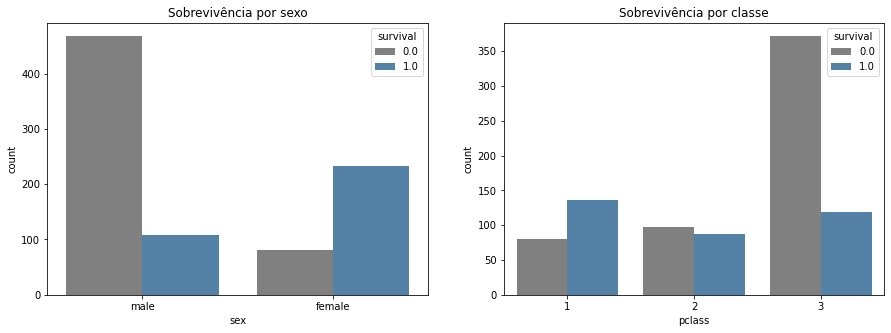

In [41]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw = True)

df = pd.crosstab(index = surv["sex"],
                columns = surv["survival"],
                margins = True,
                margins_name = "Total",
                normalize = 'index')
    
display_side_by_side(df)

fig, ax = plt.subplots(1,2, figsize=(15, 5))

sns.countplot(x = surv["sex"],
            hue = surv["survival"],
            palette = ['gray', 'steelblue'],
             ax = ax[0])

sns.countplot(x = surv["pclass"],
            hue = surv["survival"],
            palette = ['gray', 'steelblue'],
            ax = ax[1])

ax[0].set_title('Sobrevivência por sexo')
ax[1].set_title('Sobrevivência por classe')

Não é difícil perceber que a maioria dos homens morreram, e a maioria das mulheres sobreviveram.

Também fica claro a maior mortalidade na Terceira classe. Talvez por ficarem mais longe dos botes e mais próximos da invasão de água, ou talvez por se tratarem de na sua grande maioria de homens. Cabendo um olhar mais próximo para se averiguar isso.

Sobrevivência    	| Sobrevivência
feminina        	| masculina


survival,0.0,1.0
pclass,,
1,0.031915,0.968085
2,0.078947,0.921053
3,0.500000,0.500000
Total,0.257962,0.742038
survival,0.0,1.0
pclass,,
1,0.631148,0.368852
2,0.842593,0.157407
3,0.864553,0.135447


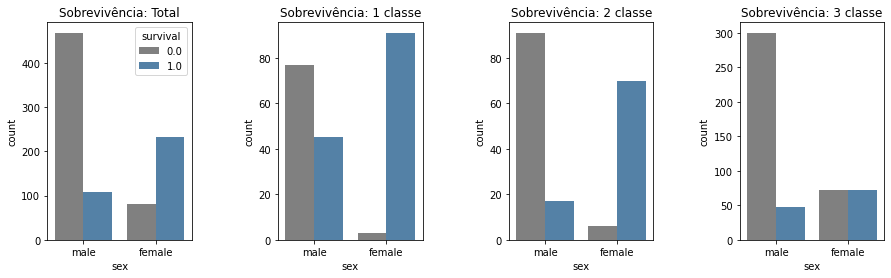

In [42]:
fig, ax = plt.subplots(1,4, figsize=(15, 4))
sns.countplot(x = surv["sex"],
            hue = surv["survival"],
            order = ["male", "female"],
            palette = ['gray', 'steelblue'],
            ax = ax[0]
            )
sns.countplot(x = surv.query('pclass==1')["sex"],
            hue = surv["survival"],
            order = ["male", "female"],
            palette = ['gray', 'steelblue'],
            ax = ax[1]
            )
sns.countplot(x = surv.query('pclass==2')["sex"],
            hue = surv["survival"],
            order = ["male", "female"],
            palette = ['gray', 'steelblue'],
            ax = ax[2]
            )
sns.countplot(x = surv.query('pclass==3')["sex"],
            hue = surv["survival"],
            order = ["male", "female"],
            palette = ['gray', 'steelblue'],
            ax = ax[3]
            )
ax[1].get_legend().remove()
ax[2].get_legend().remove()
ax[3].get_legend().remove()

ax[0].set_title('Sobrevivência: Total')
ax[1].set_title('Sobrevivência: 1 classe')
ax[2].set_title('Sobrevivência: 2 classe')
ax[3].set_title('Sobrevivência: 3 classe')
fig.subplots_adjust(wspace = .6)


print("Sobrevivência    \t| Sobrevivência")
print("feminina        \t| masculina")

df1 = pd.crosstab(index = surv.query('sex=="female"')["pclass"],
           columns = surv["survival"],
           margins = True,
           margins_name = "Total",
           normalize = 'index')
df2 = pd.crosstab(index = surv.query('sex=="male"')["pclass"],
           columns = surv["survival"],
           margins = True,
           margins_name = "Total",
           normalize = 'index')
display_side_by_side(df1,df2)


A proporção de mulheres que sobreviveram nas classes primeira e segunda é muito parecida. Porém as da terceira classe essa proporção é bem menor, também vemos que a sobrevivência masculina aumentou bastante na primeira classe.

- Mulheres tiveram maior taxa de sobrevivência em relação aos homens,
- Mulheres da terceira classe tiveram sobrevivência menor do que mulheres das demais classes,
- Homens da primeira classe tiveram sobrevivência maior do que homens das demais classes.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/Titanic-New_York_Herald_front_page.jpeg/435px-Titanic-New_York_Herald_front_page.jpeg" width="200">

<p>
<i>
<strong>
<font style="color: rgb(64,200,124); font-family: Arial">
Dia 15 de Abril:  
</font>
</strong>
</i>
</p>

<p>
<i>
<strong>
<font style="color: rgb(64,200,124); font-family: Arial">
00h30m, Os botes salva-vidas são ativados. Mulheres e crianças recebem preferência para entrarem nos barcos.
</font>
</strong>
</i>
</p>

<p>
<i>
<strong>
<font style="color: rgb(64,200,124); font-family: Arial">
02h10m, Pessoas imersas na água não sobrevivem mais do que 15 minutos. As luzes do navio se desligam.
</font>
</strong>
</i>
</p>

<p>
<i>
<strong>
<font style="color: rgb(64,200,124); font-family: Arial">
02h17m, Titanic quebra ao meio,
</font>
</strong>
</i>
</p>

<p>
<i>
<strong>
<font style="color: rgb(64,200,124); font-family: Arial">
02h19m, Proa começa a afundar,
</font>
</strong>
</i>
</p>

<p>
<i>
<strong>
<font style="color: rgb(64,200,124); font-family: Arial">
02h24m, O navio impossível de afundar chega ao fundo do oceano.
</font>
</strong>
</i>
</p>


# Resumo das conclusões

- **1. Como as características coletadas se comportam em relação à cidade de embarque?**
    - As classes de serviços variaram muito de acordo com o embarque. Em Southamp a maioria era na terceira classe, alguns na segunda e poucos na primeira. Chebourgh haviam poucos na segunda classe, vários na primeira e alguns na terceira. Já em Queenstown praticamente todos eram na terceira classe.
    - A média dos preços também variou nas cidades, em grande parte por conta da diferença nas classes de serviço, assim como o sexo dos passageiros.  

- **2. Como as características coletadas se comportam em relação ao preço da passagem?**
    - As variáveis que mais afetaram os preços foram a classe de serviço e a presença de familiares a bordo (parch).
    
- **3. Como as características coletadas se comportam em relação à sobrevivência dos passageiros?**
    - O sexo da pessoa influenciou muito na sobrevivência, por jornais da época, acreditamos que isso se deve ao fato do costume de "Mulheres e crianças primeiros" quando se trata de situações de perigo.
    - A classe de serviço também influenciou bastante, com a primeira classe possuindo menor proporção de mortes e a terceira classe com maior proporção de mortes.
    
- **4. Como essas 3 variáveis (embarked, fare e survival) se relacionam entre si?**

    - As variáveis embarked e fare se relacionam mediadas pelo classe de viagem dos passageiros. O público para cada viagem foi muito distinto, por exemplo em Queenstown praticamente todos os passageiros eram para a terceira classe.

    - As variáveis embarked e survival se relacionam muito pouco e essa mediação é também pelo classe de viagem dos passageiros. A primeira classe, quando estudadas em vista do sexo do passageiro, foi teve menor porporção de óbitos e a terceira teve maior proporção de óbitos.

    - As variáveis fare e survival, assim como embarked e survival, são medidas pela classe do passageiro. Passageiros que pagaram muito pelas passagens tem maiores chances de estarem na primeira classe - onde houve menor proporção de óbitos -, enquanto passageiros que pouco possuem mais chance de estar na terceira classe.

## Limitações 

- As definições das variáveis 'parch' e 'sibsp' não estavam coerentes com o banco de dados, mas com uma rápida pesquisa foi possível descobrir do que se tratavam.

- A quantidade de dados faltantes na variável 'age' (263) pode ter comprometido algumas análises. Como exemplo, historicamente se sabe que crianças tiveram prioridade nos botes, essa informação pode se perder em meio aos dados faltantes.

- A quantidade de dados faltantes na variável 'survival' (418) tem grande chance de comprometido as análises de quem se salvou.

- O preço das passagens sofreram bastante influência da variável 'parch', talvez porque o preço da passagens dos filhos fossem acrescentados na passagem de um dos pais, o que explicaria a grande variação em cada um dos níveis de 'parch'.